<a href="https://colab.research.google.com/github/rabinkahoonay/test/blob/main/capital_markets_13_4_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install yfinance --upgrade --no-cache-dir
#!pip install yahoo_fin
import pandas as pd
import yfinance as yf
import calendar
import numpy as np
from datetime import date
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from google.colab import drive
today = datetime.today()
from sklearn.linear_model import LogisticRegression

In [ ]:
index_list = ['^GSPC', '^DJI', '^IXIC',
              '^VIX','^VVIX','^VIX9D','^VIX3M','^VIX6M',
                     '^FVX','^TNX','^TYX']
data = yf.download(index_list, start='2015-1-1')['Adj Close']
df= pd.DataFrame([[data]])
df=data.fillna(method='ffill')
df = df.reset_index().round(2)
df = df.rename(columns={  '^GSPC' :'S&P500'    ,
                          '^DJI'  :'Dow_Jones' ,'^IXIC'    :'NASDAQ',
                          '^VIX'  :'VIX'       ,'^VVIX'    :'VIX_Index',
                          '^VIX9D':'VIX9D'     ,'^VIX3M'   :'VIX3M',
                          '^VIX6M':'VIX6M'     ,
                                                '^FVX'     :'T5Y',
                          '^TNX'  :'T10Y'      ,'^TYX'     :'T30Y'
                          })

df['Day'] = pd.to_datetime(df['Date']).dt.day
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Year'] = pd.to_datetime(df['Date']).dt.year
df = df.set_index('Date')
df.head(5)

[*********************100%%**********************]  11 of 11 completed


Ticker,Dow_Jones,T5Y,S&P500,NASDAQ,T10Y,T30Y,VIX,VIX3M,VIX6M,VIX9D,VIX_Index,Day,Month,Year
Date,,,,,,,,,,,,,,
2015-01-02,17832.99,1.62,2058.20,4726.81,2.12,2.70,17.79,19.46,20.24,16.47,112.55,2,1,2015
2015-01-05,17501.65,1.57,2020.58,4652.57,2.04,2.61,19.92,20.79,21.40,19.45,121.87,5,1,2015
2015-01-06,17371.64,1.49,2002.61,4592.74,1.96,2.52,21.12,21.42,21.73,20.53,118.45,6,1,2015
2015-01-07,17584.52,1.47,2025.90,4650.47,1.95,2.52,19.31,20.08,20.92,17.59,107.69,7,1,2015
2015-01-08,17907.87,1.50,2062.14,4736.19,2.02,2.59,17.01,18.66,19.56,15.04,98.44,8,1,2015


In [ ]:
def add_daily_change(df):
  # Identify time series columns (assuming numeric datatypes for simplicity)
  numeric_cols = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]
  timeseries_cols = [col for col in numeric_cols if len(df) > 1]  # Ensure there are at least 2 rows

  # Create new columns with daily changes (shift by -1 for difference)
  for col in timeseries_cols:
    df[col + "_p"] = df[col].diff(periods=1).round(2)
    df[col + "_c1"]= (df[col].pct_change(1)*100).round(2)
    df[col + "_c2"]= (df[col].pct_change(2)*100).round(2)
    df[col + "_c3"]= (df[col].pct_change(3)*100).round(2)
  return df



df = add_daily_change(df.copy())  # Operate on a copy to avoid modifying the original
df=df.round(2)
#print("Daily Data of the indices \n   " , df.tail(5))
pd.set_option('display.max_rows', None)
df.tail(10).T

Date,2024-04-01,2024-04-02,2024-04-03,2024-04-04,2024-04-05,2024-04-08,2024-04-09,2024-04-10,2024-04-11,2024-04-12
Ticker,,,,,,,,,,
Dow_Jones,39566.85,39170.24,39127.14,38596.98,38904.04,38892.80,38883.67,38461.51,38459.08,37983.24
T5Y,4.34,4.35,4.34,4.29,4.37,4.43,4.38,4.61,4.62,4.53
S&P500,5243.77,5205.81,5211.49,5147.21,5204.34,5202.39,5209.91,5160.64,5199.06,5123.41
NASDAQ,16396.83,16240.45,16277.46,16049.08,16248.52,16253.96,16306.64,16170.36,16442.20,16175.09
T10Y,4.33,4.36,4.36,4.31,4.38,4.42,4.37,4.56,4.58,4.50
T30Y,4.47,4.51,4.51,4.47,4.53,4.55,4.50,4.64,4.66,4.60
VIX,13.65,14.61,14.33,16.35,16.03,15.19,14.98,15.80,14.91,17.31
VIX3M,15.52,16.09,15.91,17.16,17.18,16.56,16.42,17.04,16.49,18.20
VIX6M,17.42,17.84,17.74,18.65,18.68,18.16,18.07,18.54,18.15,19.38


In [ ]:
Target_variables=['Dow_Jones','S&P500','NASDAQ']
Target_variables_lags=['Dow_Jones_p','Dow_Jones_c1','Dow_Jones_c2','Dow_Jones_c3',
                       'S&P500_p','S&P500_c1','S&P500_c2','S&P500_c3',
                       'NASDAQ_p','NASDAQ_c1','NASDAQ_c2','NASDAQ_c3']
Target_variables_MA=['Dow_Jones/_MA30','Dow_Jones_MA30',
                     'S&P500/_MA30','S&P500_MA30',
                     'NASDAQ/_MA30','NASDAQ_MA30']
Time_variables=['Day', 'Day_c1', 'Day_c2', 'Day_c3', 'Day_p',
                'Month', 'Month_c1','Month_c2', 'Month_c3', 'Month_p',
                'Year', 'Year_c1','Year_c2', 'Year_c3', 'Year_p']
features = df.columns.difference(Target_variables + Target_variables_lags+Target_variables_MA+Time_variables)
print(features)


Index(['T10Y', 'T10Y_c1', 'T10Y_c2', 'T10Y_c3', 'T10Y_p', 'T30Y', 'T30Y_c1',
       'T30Y_c2', 'T30Y_c3', 'T30Y_p', 'T5Y', 'T5Y_c1', 'T5Y_c2', 'T5Y_c3',
       'T5Y_p', 'VIX', 'VIX3M', 'VIX3M_c1', 'VIX3M_c2', 'VIX3M_c3', 'VIX3M_p',
       'VIX6M', 'VIX6M_c1', 'VIX6M_c2', 'VIX6M_c3', 'VIX6M_p', 'VIX9D',
       'VIX9D_c1', 'VIX9D_c2', 'VIX9D_c3', 'VIX9D_p', 'VIX_Index',
       'VIX_Index_c1', 'VIX_Index_c2', 'VIX_Index_c3', 'VIX_Index_p', 'VIX_c1',
       'VIX_c2', 'VIX_c3', 'VIX_p'],
      dtype='object', name='Ticker')


In [ ]:
# Get today's date in YYYY-MM-DD format
today = date.today().strftime('%Y-%m-%d')

# Create the filename with today's date
filename = f'Data_{today}.csv'

# Save the DataFrame to a CSV file
df.to_csv(filename, index=True)


In [ ]:
# חישוב ממוצע נע עבור עמדות ספציפיות
New_Names=['S&P500','Dow_Jones','NASDAQ','VIX','VIX_Index','VIX9D','VIX3M','VIX6M','T5Y','T10Y','T30Y']
window_size = 30
for col in New_Names:
    df[col + "_MA30"] = df[col].rolling(window_size).mean().round(2)
    df[col + "/_MA30"] = (df[col]/df[col + "_MA30"]).round(4)
df.tail(5).T

Date,2024-04-08,2024-04-09,2024-04-10,2024-04-11,2024-04-12
Ticker,,,,,
Dow_Jones,38892.8000,38883.6700,38461.5100,38459.0800,37983.2400
T5Y,4.4300,4.3800,4.6100,4.6200,4.5300
S&P500,5202.3900,5209.9100,5160.6400,5199.0600,5123.4100
NASDAQ,16253.9600,16306.6400,16170.3600,16442.2000,16175.0900
T10Y,4.4200,4.3700,4.5600,4.5800,4.5000
T30Y,4.5500,4.5000,4.6400,4.6600,4.6000
VIX,15.1900,14.9800,15.8000,14.9100,17.3100
VIX3M,16.5600,16.4200,17.0400,16.4900,18.2000
VIX6M,18.1600,18.0700,18.5400,18.1500,19.3800


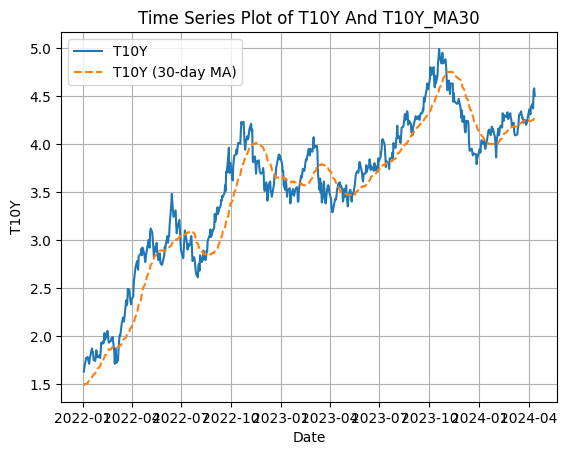

In [ ]:
import matplotlib.pyplot as plt
dates = pd.date_range("2022-01-01", pd.to_datetime("today"))
df1 = df.loc[df.index.isin(dates)]
plt.xlabel('Date')
plt.ylabel('T10Y')
plt.plot(df1.index, df1["T10Y"], linestyle="-", label="T10Y")
plt.plot(df1.index, df1["T10Y_MA30"], linestyle="--", label="T10Y (30-day MA)")
plt.legend()
plt.title('Time Series Plot of T10Y And T10Y_MA30')
plt.grid(True)

In [ ]:
df = df[31:]
combined_features = features.tolist() + Target_variables  # Convert features to list
data = df[combined_features]
print(data.tail())
X = df[features]
corr = data.corr()
print (corr)
data_sp500 = data.drop(columns=['NASDAQ', 'Dow_Jones'])

Ticker      T10Y  T10Y_c1  T10Y_c2  T10Y_c3  T10Y_p  T30Y  T30Y_c1  T30Y_c2  \
Date                                                                          
2024-04-08  4.42     0.91     2.55     1.38    0.04  4.55     0.44     1.79   
2024-04-09  4.37    -1.13    -0.23     1.39   -0.05  4.50    -1.10    -0.66   
2024-04-10  4.56     4.35     3.17     4.11    0.19  4.64     3.11     1.98   
2024-04-11  4.58     0.44     4.81     3.62    0.02  4.66     0.43     3.56   
2024-04-12  4.50    -1.75    -1.32     2.97   -0.08  4.60    -1.29    -0.86   

Ticker      T30Y_c3  T30Y_p  ...  VIX_Index_c2  VIX_Index_c3  VIX_Index_p  \
Date                         ...                                            
2024-04-08     0.89    0.02  ...         -4.20          6.39        -4.32   
2024-04-09     0.67   -0.05  ...         -6.77         -6.21        -1.81   
2024-04-10     2.43    0.14  ...          6.38          1.30         7.31   
2024-04-11     2.42    0.02  ...          5.86          3.64 

In [ ]:
#    הוספת המשתנה המוסבר שהוא אחד אם המדד עלה ביום האחרון או אפס אם הוא ירד
data_sp500['S&P500_indicator_t1'] = np.where((data_sp500['S&P500']-data_sp500['S&P500'].shift(1)) > 0, 1, 0)
#   אימון מודל רגרסיה לוגיסטית #
model = LogisticRegression()
model.fit(data_sp500[features], data_sp500['S&P500_indicator_t1'])

#חיזוי הסבירות לנתונים האחרונים שנמשרו
prediction = model.predict_proba(data_sp500[features].tail(1))[:, 1]

#הדפסת הסבירות
print(prediction*100)



[0.03131342]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# נתונים היסטוריים
data = pd.read_csv("data.csv")

# ממוצע וסטיית תקן
mean = data["Price_Today"].mean()
std = data["Price_Today"].std()

# קורלציה
corr = data.corr()

# פיצ'רים
FEATURES = ["Volume_Today", "Interest_Rate", "News"]

# אימון מודל רגרסיה לוגיסטית
model = LogisticRegression()
model.fit(data[FEATURES], data["Price_Change_Tomorrow"])

# חיזוי הסבירות
prediction = model.predict_proba([[10000000, 0.02, 1]])[:, 1]

# הדפסת הסבירות
print(prediction)